### Урок 3. Классификация. Логистическая регрессия

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss, accuracy_score, precision_score
from sklearn.metrics import recall_score, f1_score, confusion_matrix

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2,  1, 3, 3, 1, 2]], dtype=np.float64)
y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype=np.float64)

In [3]:
X

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+00, 5.00e+00, 3.00e+00, 0.00e+00,
        5.00e+00, 1.00e+01, 1.00e+00, 2.00e+00],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [4]:
y

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

In [5]:
def calc_std_feat(x):
    res = (x - x.mean()) / x.std()
    return res

In [6]:
X_st = X.copy()
X_st[2, :] = calc_std_feat(X[2, :])

In [7]:
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 1.        ,  1.        ,  2.        ,  5.        ,  3.        ,
         0.        ,  5.        , 10.        ,  1.        ,  2.        ],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [ 1.        ,  1.        ,  2.        ,  1.        ,  2.        ,
         1.        ,  3.        ,  3.        ,  1.        ,  2.        ]])

In [8]:
def calc_logloss(y, y_pred):
    err = - np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    err = np.sum(err)
    return err

In [9]:
# Пример применения
y1 = np.array([1, 0])
y_pred1 = np.array([0.9, 0.1])
calc_logloss(y1, y_pred1)

0.10536051565782628

In [10]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

In [11]:
z = np.linspace(-10, 10, 101)

In [12]:
probabilities = sigmoid(z)

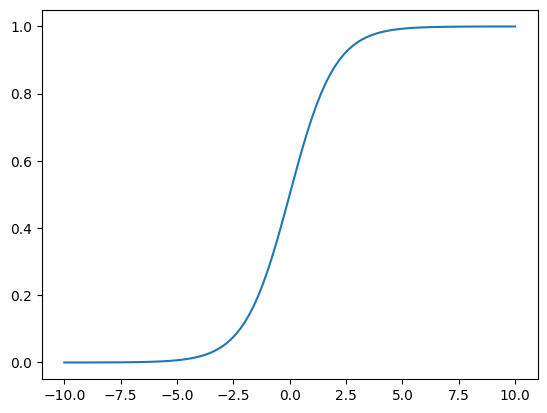

In [13]:
plt.plot(z, probabilities)
plt.show()

Logistic Regression

In [14]:
def eval_model(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [15]:
W = eval_model(X_st, y, iterations=5000, alpha=1e-4)

500 [ 0.47822106 -0.20918419  0.64605995  1.49531432] 1.0559639161585663
1000 [ 0.46074241 -0.27647603  0.64395686  1.46891696] 0.945214871179169
1500 [ 0.44435675 -0.33951515  0.64152026  1.44406912] 0.8478360281905125
2000 [ 0.42913461 -0.39751872  0.63899625  1.42106251] 0.7651177745022368
2500 [ 0.41513888 -0.44956784  0.63671032  1.40023024] 0.6981293270105476
3000 [ 0.40240136 -0.49488241  0.63498247  1.38184975] 0.6468813805442176
3500 [ 0.39088925 -0.53321212  0.63401986  1.36601535] 0.6097021563515638
4000 [ 0.38049869 -0.56497213  0.63387116  1.35259671] 0.5836774145473645
4500 [ 0.37108342 -0.59102182  0.63446603  1.3413119 ] 0.5657147376221167
5000 [ 0.36249064 -0.61234585  0.63568321  1.33183158] 0.5532737788236779


## Практическое задание

1. Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.
2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.
3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1. На вход подаётся W, который уже посчитан функцией eval_model, и X, на выходе — массив y_pred_proba.
4. Создайте функцию calc_pred, возвращающую предсказанный класс. На вход подаётся W, который уже посчитан функцией eval_model, и X, на выходе — массив y_pred.
5. Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.
6. Могла ли модель переобучиться? Почему?

01

In [16]:
def calc_logloss(y, y_pred):
    """
    y, y_pred - numpy.arrays
    return log loss error including values in y_pred equal 0 or 1
    """
    y_pred = np.clip(y_pred, 1e-8, 1 - 1e-8)
    return - np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

In [17]:
y1 = np.array([1, 0])
y_pred1 = np.array([1, 0.2])
my_log_loss = round(calc_logloss(y1, y_pred1), 8)
my_log_loss

0.11157178

In [18]:
build_in_log_loss = round(log_loss(y1, y_pred1), 8)
build_in_log_loss

0.11157178

In [19]:
my_log_loss == build_in_log_loss

True

02

In [20]:
def standard_scale(X):
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    return (X - mean) / std

In [21]:
X_st = X.T.astype(np.float64)
X_st[:, 1:4] = standard_scale(X_st[:, 1:4])
X_st

array([[ 1.        , -0.70710678, -0.97958969, -0.89625816],
       [ 1.        , -0.70710678, -0.56713087, -0.89625816],
       [ 1.        , -0.35355339, -0.46401617,  0.38411064],
       [ 1.        ,  0.70710678, -0.77336028, -0.89625816],
       [ 1.        ,  0.        ,  0.97958969,  0.38411064],
       [ 1.        , -1.06066017, -0.36090146, -0.89625816],
       [ 1.        ,  0.70710678,  1.08270439,  1.66447944],
       [ 1.        ,  2.47487373,  2.11385144,  1.66447944],
       [ 1.        , -0.70710678, -1.08270439, -0.89625816],
       [ 1.        , -0.35355339,  0.05155735,  0.38411064]])

In [22]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

Функция нахождения лог лосс использует сигмоиду, которая не имеет минимума. Мы получили прекрасные результаты на альфе, равной 42, при 100 тыс. итераций. Скорее всего, еще увеличив значения, можно получить еще меньшую ошибку. Но нам видится в этом не оптимизация, а дополнительная работа. Мы остановились на лучших значениях альфы, равной единице, и на количестве итераций, равном 100. Ошибка составила .2895. 

In [23]:
def eval_model(X, y, iterations, alpha):
    np.random.seed(42)
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
        
    for i in range(iterations):
        z = np.dot(X, W)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        
        dQ = 1 / n * X.T @ (y_pred - y)
        W -= alpha * dQ
        if not i % (iterations / 10):
            print(f'Iter - {i}, Weights - {W}, error - {err}')
    final_error = calc_logloss(y, y_pred)
    return W, final_error

In [24]:
W, error = eval_model(X_st, y, iterations=100, alpha=1)
print(f'Iter - 100, Weights - {W}, error - {error}')

Iter - 0, Weights - [ 0.46121499 -0.40908382  0.41426183  1.39855008], error - 0.760958797591889
Iter - 10, Weights - [ 0.0387634  -1.30386446 -0.15001914  1.74758184], error - 0.4254600283700162
Iter - 20, Weights - [-0.01161527 -1.64023671 -0.31196552  2.27533881], error - 0.38108858271134743
Iter - 30, Weights - [-0.01156172 -1.88360488 -0.46035705  2.69723081], error - 0.3542235298084087
Iter - 40, Weights - [ 9.33444488e-04 -2.07189803e+00 -5.97280973e-01  3.05064764e+00], error - 0.33580021416553474
Iter - 50, Weights - [ 0.01934395 -2.22448855 -0.72422385  3.35653644], error - 0.3221745410588311
Iter - 60, Weights - [ 0.04127542 -2.35245169 -0.84255667  3.6277315 ], error - 0.31154425165004745
Iter - 70, Weights - [ 0.06539266 -2.46266676 -0.95347146  3.87262358], error - 0.3029143996576552
Iter - 80, Weights - [ 0.090846   -2.55967079 -1.05796576  4.09697143], error - 0.29569092767181626
Iter - 90, Weights - [ 0.11707191 -2.64659092 -1.15686395  4.30488038], error - 0.289497214

03

In [25]:
def calc_pred_proba(W, X):
    """
    W, X - numpy.arrays
    return probability to be in class 1
    """
    return sigmoid(np.dot(X, W))

In [26]:
y_pred_proba = calc_pred_proba(W, X_st)
y_pred_proba

array([0.32380055, 0.22296142, 0.96767742, 0.00787362, 0.65604029,
       0.36735518, 0.98703363, 0.14768606, 0.35244079, 0.94041789])

04

In [27]:
def calc_pred(W, X):
    """
    W, X - numpy.arrays
    return predicted y
    """
    y_pred_proba = calc_pred_proba(W, X)
    return np.where(y_pred_proba < .5, 0, 1)

In [28]:
y_pred = calc_pred(W, X_st)
print(f'y      = {y.astype(int)}')
print(f'y_pred = {y_pred}')

y      = [0 0 1 0 1 0 1 0 1 1]
y_pred = [0 0 1 0 1 0 1 0 0 1]


05

In [29]:
def accuracy(y, y_pred):
    """
    y, y_pred - numpy.arrays
    return accuracy of equality of y and y_pred
    """    
    return np.mean(y == y_pred)

In [30]:
accuracy_v = accuracy(y, y_pred)
accuracy_v

0.9

In [31]:
def conf_matrix(y, y_pred):
    """
    y, y_pred - numpy.arrays
    return confusion matrix of these arrays
    """    
    TP, FP, FN, TN = 0, 0, 0, 0 
    for i in range(len(y)):
        if y[i] == y_pred[i] == 1:
            TP += 1
        elif y[i] != y_pred[i] == 1:
            FP += 1
        elif y[i] != y_pred[i] == 0:
            FN += 1
        elif y[i] == y_pred[i] == 0:
            TN += 1
    return {'TP': TP, 'FP': FP, 'FN': FN, 'TN': TN}

In [32]:
confusion = conf_matrix(y, y_pred)
print(f"{confusion['TP']} {confusion['FP']}\n{confusion['FN']} {confusion['TN']}")

4 0
1 5


In [33]:
def precision(square):
    """
    square - a dict with confusion matrix in it
    return precision value 
    """
    return square['TP'] / (square['TP'] + square['FP'])

In [34]:
precision_v = precision(confusion)
precision_v

1.0

In [35]:
def recall(square):
    """
    square - a dict with confusion matrix in it
    return recall value 
    """
    return square['TP'] / (square['TP'] + square['FN'])

In [36]:
recall_v = recall(confusion)
recall_v

0.8

In [37]:
def f1(precision_f, recall_f):
    """
    precision_f, recall_f - floats
    return f1 score calculated by formula
    """
    return 2 * precision_f * recall_f / (precision_f + recall_f)

In [38]:
f1_v = f1(precision_v, recall_v)
f1_v

0.888888888888889

In [39]:
print(f'Our accuracy = {accuracy_v}, build-in accuracy = {accuracy_score(y, y_pred)}.')
print(f'Our precision = {precision_v}, build-in precision = {precision_score(y, y_pred)}.')
print(f'Our recall = {recall_v}, build-in recall = {recall_score(y, y_pred)}.')
print(f'Our f1 = {f1_v}, build-in f1 = {f1_score(y, y_pred)}.')
print(f"\n[[{confusion['TP']} {confusion['FP']}]\n [{confusion['FN']} {confusion['TN']}]]")
print(f'\n{confusion_matrix(y, y_pred)}')

Our accuracy = 0.9, build-in accuracy = 0.9.
Our precision = 1.0, build-in precision = 1.0.
Our recall = 0.8, build-in recall = 0.8.
Our f1 = 0.888888888888889, build-in f1 = 0.888888888888889.

[[4 0]
 [1 5]]

[[5 0]
 [1 4]]


06

Может. Модель может подстроиться под тренировочные данные и иметь очень низкую способность к 
обработке и обобщению новых данных. Чтобы избежать переобучения и увеличения ошибки, нужно разбить данные на тренировочные и тестовые. Также можно использовать кросс-валидацию.